In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
reviews = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\filtered_reviews.csv")

CREATING A FUNCTION THAT NORMALIZE THE TEXT

In [3]:
def normalize_text(text):
    text = text.lower() #lowercase
    # remove puntuation, numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # tokenize
    words = nltk.word_tokenize(text)
    # remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # lemmatize
    words = [WordNetLemmatizer().lemmatize(w) for w in words]

    text = ' '.join(words)
    return text

In [4]:
# applying the function to the reviews
reviews['normalized_review'] = reviews['text'].apply(normalize_text)

In [5]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,normalized_review
0,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06,great place breakfast waffle fluffy perfect ho...
1,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2018-02-11 03:11:20,skip train wreck looking dinner server clueles...
2,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,0,0,0,Service and management terrible... After messi...,2013-12-07 13:17:13,service management terrible messing order wait...
3,OJO7m2zn3LAr011J1I7ppQ,JriXL8qqw_tJ1mpwtlBabg,1QVB0_-piu0GXes87BXeGw,5,1,0,0,Love this place...best hot dogs and chili dogs...,2017-10-11 01:27:15,love placebest hot dog chili dog aroundi go ma...
4,LnKr0hwejzl71QmoQyTRDQ,7RU_xK1tEGlUvXfe0GvtEg,hAmuto6UndVroyd_DaD-TA,5,1,0,0,Not sure why it took until now for us to find ...,2018-03-04 00:20:24,sure took u find place started going chain lob...


In [6]:
reviews.to_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\normalized_reviews.csv", index=False)

In [2]:
reviews = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\normalized_reviews.csv")

SENTIMENT ANALYSIS WITH HUGGINGFACE PIPELINE

In [3]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis') # load the sentiment analysis model


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [11]:
reviews['normalized_review'] = reviews['normalized_review'].astype(str)

In [12]:
# setting maximum length of the text to 512 tokens to avoid errors
reviews['normalized_review'] = reviews['normalized_review'].str.slice(0, 512)


In [14]:
# appling the sentiment analysis model to the normalized reviews

reviews['sentiment'] = reviews['normalized_review'].apply(lambda x: classifier(x)[0]['label'])

reviews.head()

KeyboardInterrupt: 

In [17]:
reviews.to_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\sentiment_reviews.csv", index=False)

In [2]:
reviews = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\sentiment_reviews.csv")
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,normalized_review,sentiment
0,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06,great place breakfast waffle fluffy perfect ho...,POSITIVE
1,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2018-02-11 03:11:20,skip train wreck looking dinner server clueles...,NEGATIVE
2,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,0,0,0,Service and management terrible... After messi...,2013-12-07 13:17:13,service management terrible messing order wait...,NEGATIVE
3,OJO7m2zn3LAr011J1I7ppQ,JriXL8qqw_tJ1mpwtlBabg,1QVB0_-piu0GXes87BXeGw,5,1,0,0,Love this place...best hot dogs and chili dogs...,2017-10-11 01:27:15,love placebest hot dog chili dog aroundi go ma...,POSITIVE
4,LnKr0hwejzl71QmoQyTRDQ,7RU_xK1tEGlUvXfe0GvtEg,hAmuto6UndVroyd_DaD-TA,5,1,0,0,Not sure why it took until now for us to find ...,2018-03-04 00:20:24,sure took u find place started going chain lob...,NEGATIVE


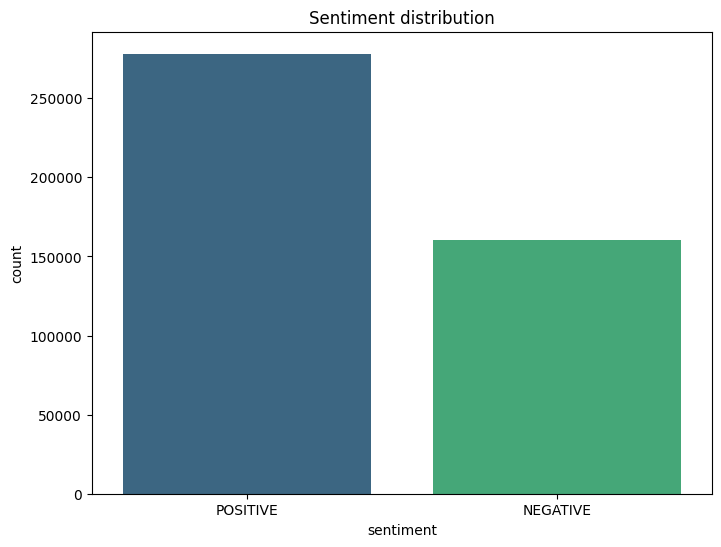

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating a barplot to show the distribution of the sentiment
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='sentiment', palette='viridis')
plt.title('Sentiment distribution')
plt.show()

# SENTIMENT ANALYSIS  
  
Correlation between sentiment and stars  
Sentiment over time  
Correlation between sentiment and interactions (useful, funny, cool)
  
At a later time, I will add the following:  
Sentiment by review category (only for top 100 users)
Sentiment by user (after user clusterization)

### Sentiment VS Stars  

Objective: Determine if there's a correlation between the sentiment detected in reviews and the star ratings left by users.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


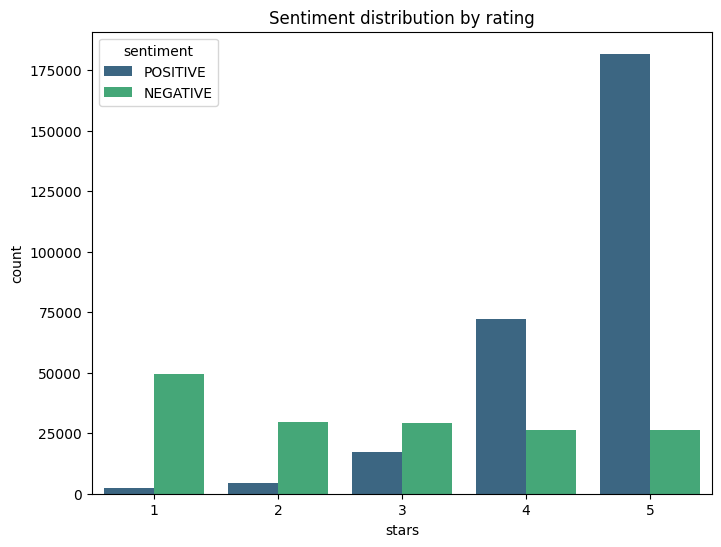

In [7]:
# creating a barplot to show the distribution of the sentiment vs the rating

plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='stars', hue='sentiment', palette='viridis')
plt.title('Sentiment distribution by rating')
plt.show()


(insights in the book)

### Sentiment over time

In [9]:
# Data preparation

# converting date values to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# extracting year and quarter from the date
reviews['year'] = reviews['date'].dt.to_period('Q')

# converting sentiment to numerical values (positive=1, negative=0) in a new column

reviews['sentiment_value'] = reviews['sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)


In [11]:
reviews.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,normalized_review,sentiment,year,sentiment_value
0,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06,great place breakfast waffle fluffy perfect ho...,POSITIVE,2014Q4,1


In [12]:
# grouping the data by quarter and calculating the average sentiment value

sentiment_by_quarter = reviews.groupby('year')['sentiment_value'].mean().reset_index()

# count reviews per quarter

reviews_by_quarter = reviews.groupby('year')['sentiment_value'].count().reset_index()


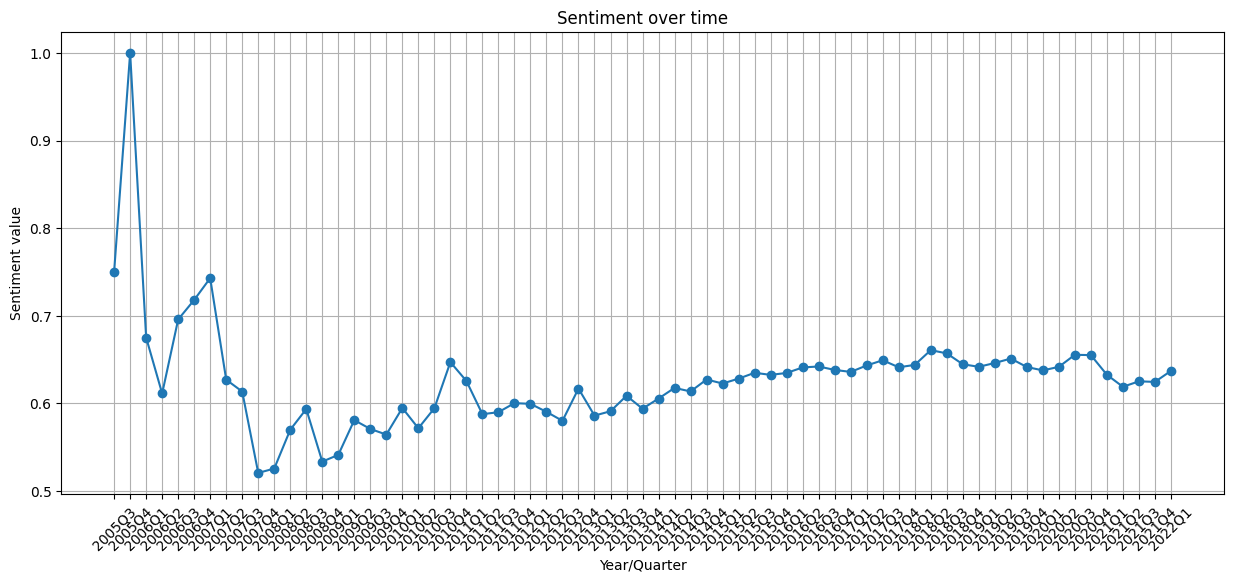

In [15]:
# plot sentiment over time

plt.figure(figsize=(15, 6))
plt.plot(sentiment_by_quarter['year'].astype(str), sentiment_by_quarter['sentiment_value'], marker='o')
plt.title('Sentiment over time')
plt.xlabel('Year/Quarter')
plt.ylabel('Sentiment value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

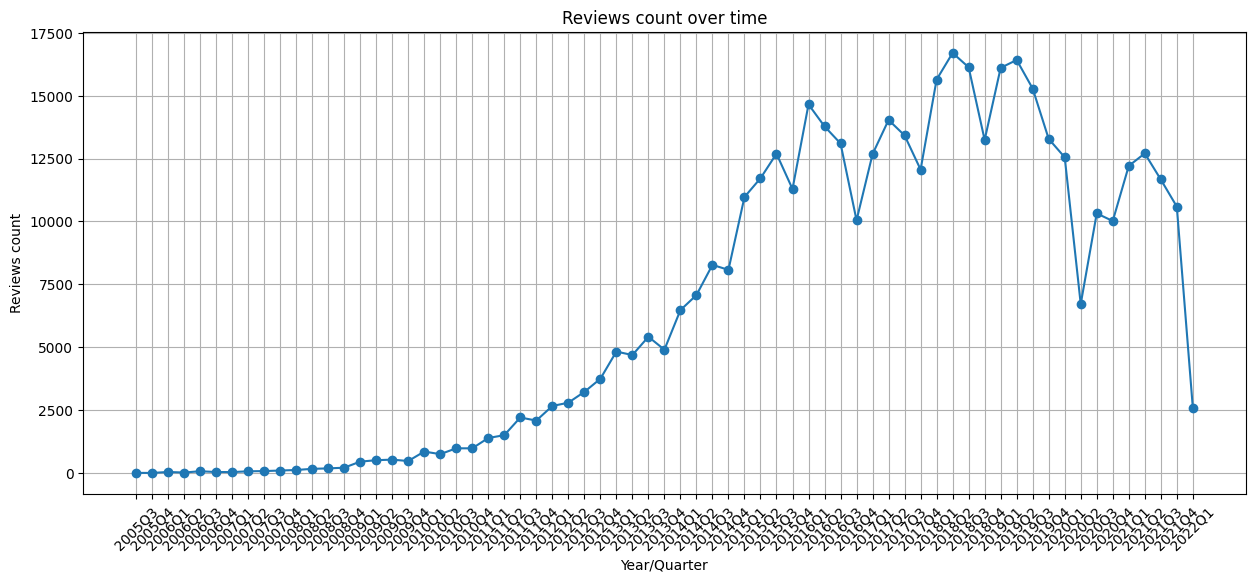

In [16]:
# plot reviews count over time

plt.figure(figsize=(15, 6))
plt.plot(reviews_by_quarter['year'].astype(str), reviews_by_quarter['sentiment_value'], marker='o')
plt.title('Reviews count over time')
plt.xlabel('Year/Quarter')
plt.ylabel('Reviews count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

(analysis and insights in the book)

### Sentiment vs interactions

In [17]:
# calculating sentiment average by interaction type
quarterly_sentiment_useful = reviews[reviews["useful"] > 0].groupby('year')['sentiment_value'].mean().reset_index(name="avg_sentiment_useful")
quarterly_sentiment_funny = reviews[reviews["funny"] > 0].groupby('year')['sentiment_value'].mean().reset_index(name="avg_sentiment_funny")
quarterly_sentiment_cool = reviews[reviews["cool"] > 0].groupby('year')['sentiment_value'].mean().reset_index(name="avg_sentiment_cool")

# calculating reviews count by interaction type
reviews_by_quarter_useful = reviews[reviews["useful"] > 0].groupby('year')['sentiment_value'].count().reset_index(name="reviews_count_useful")
reviews_by_quarter_funny = reviews[reviews["funny"] > 0].groupby('year')['sentiment_value'].count().reset_index(name="reviews_count_funny")
reviews_by_quarter_cool = reviews[reviews["cool"] > 0].groupby('year')['sentiment_value'].count().reset_index(name="reviews_count_cool")

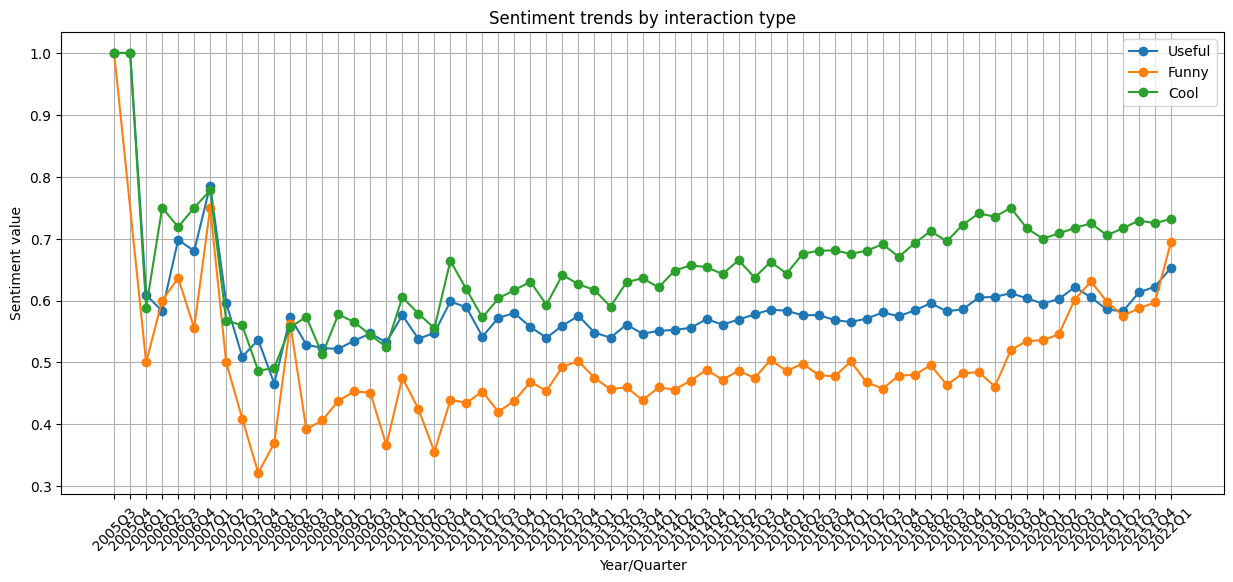

In [18]:
# plot sentiment trends by interaction type

plt.figure(figsize=(15, 6))

plt.plot(quarterly_sentiment_useful['year'].astype(str), quarterly_sentiment_useful['avg_sentiment_useful'], marker='o', label='Useful')
plt.plot(quarterly_sentiment_funny['year'].astype(str), quarterly_sentiment_funny['avg_sentiment_funny'], marker='o', label='Funny')
plt.plot(quarterly_sentiment_cool['year'].astype(str), quarterly_sentiment_cool['avg_sentiment_cool'], marker='o', label='Cool')

plt.title('Sentiment trends by interaction type')
plt.xlabel('Year/Quarter')
plt.ylabel('Sentiment value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


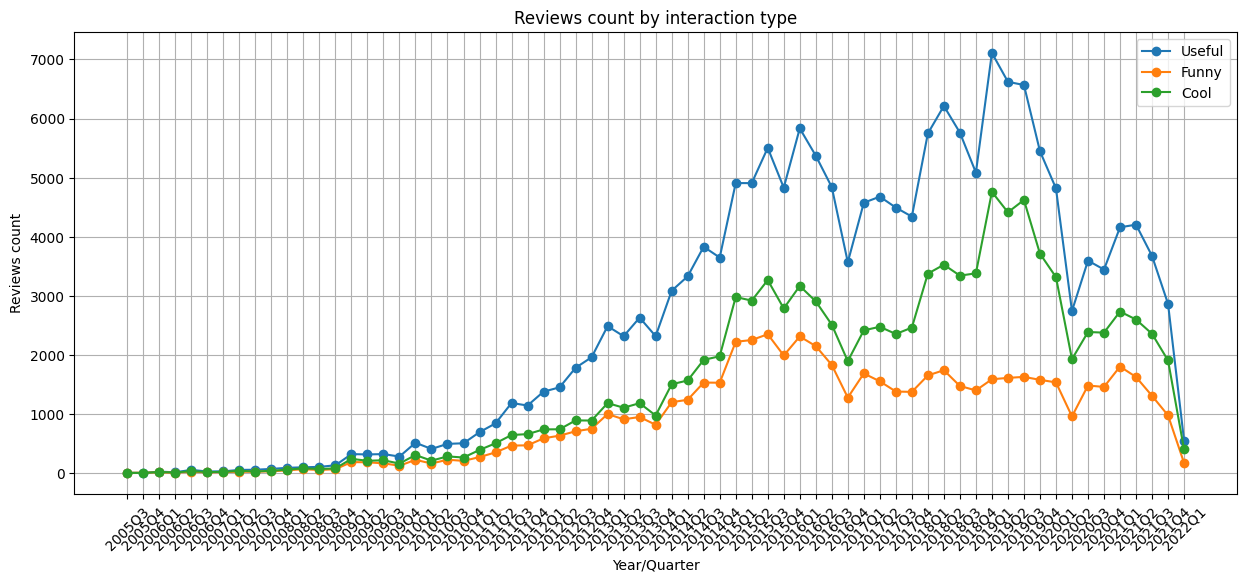

In [19]:
# plot reviews count by interaction type

plt.figure(figsize=(15, 6))

plt.plot(reviews_by_quarter_useful['year'].astype(str), reviews_by_quarter_useful['reviews_count_useful'], marker='o', label='Useful')
plt.plot(reviews_by_quarter_funny['year'].astype(str), reviews_by_quarter_funny['reviews_count_funny'], marker='o', label='Funny')
plt.plot(reviews_by_quarter_cool['year'].astype(str), reviews_by_quarter_cool['reviews_count_cool'], marker='o', label='Cool')

plt.title('Reviews count by interaction type')
plt.xlabel('Year/Quarter')
plt.ylabel('Reviews count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
